# Importing Libraries and Data

In [ ]:
import pandas as pd
import numpy as np

'''
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.model_selection import train_test_split
%matplotlib inline
''''

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

In [ ]:
dfcalendar = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Trabalho Final - Master Nuclio/daily_calendar_with_events.csv')
dfprice = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Trabalho Final - Master Nuclio/item_prices.csv')
dfsales = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Trabalho Final - Master Nuclio/item_sales.csv')

In [ ]:
#dfcalendar = pd.read_csv('daily_calendar_with_events.csv')

In [ ]:
#dfprice = pd.read_csv('item_prices.csv')

In [ ]:
#dfsales = pd.read_csv('item_sales.csv')

# Objectives:

The primary objective of this project was to develop a robust machine learning model for time series forecasting, specifically aimed at projecting sales and inventory levels for a specific retail store. The key goals were:

* Sales Forecasting: Accurately predict future sales based on historical data to enable better decision-making for marketing strategies, promotions, and inventory management.

* Inventory Management: Provide reliable inventory level projections to optimize stock replenishment schedules, minimize stockouts, and reduce excess inventory, thereby improving overall operational efficiency.

* Model Precision: Enhance the model's precision by incorporating various machine learning techniques and fine-tuning hyperparameters to ensure accurate and reliable forecasts.

* Data Utilization: Leverage historical sales and inventory data, along with external factors such as seasonal trends, holidays, and market events, to improve the model's predictive capabilities.

* Automation: Develop an automated pipeline that seamlessly integrates data preprocessing, model training, and forecasting, enabling the business to generate up-to-date projections with minimal manual intervention.

* Scalability: Ensure the model can be easily adapted to other stores or product categories, facilitating scalability across the retail chain.

* Visualization: Create clear and insightful visualizations of the sales and inventory forecasts to support business stakeholders in making informed decisions.

By achieving these objectives, the project aims to provide significant value to the retail business through improved planning, reduced costs, and enhanced customer satisfaction.

# Data Collection and Preparation

* Understand the structure, size, and basic statistics of the datasets.
* Identify any obvious outliers or anomalies.
* Check the data types of each column to ensure they are appropriate for the analysis.
* Convert data types if necessary (e.g., converting date strings to datetime objects).
* Identify missing values in the dataset.
* Create new features from existing data that may be more relevant for the model.

Calendar

In [ ]:
dfcalendar.head()

,date,weekday,weekday_int,d,event
0,2011-01-29,Saturday,1,d_1,NaN
1,2011-01-30,Sunday,2,d_2,NaN
2,2011-01-31,Monday,3,d_3,NaN
3,2011-02-01,Tuesday,4,d_4,NaN
4,2011-02-02,Wednesday,5,d_5,NaN


In [ ]:
dfcalendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1913 entries, 0 to 1912
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   date         1913 non-null   object
 1   weekday      1913 non-null   object
 2   weekday_int  1913 non-null   int64 
 3   d            1913 non-null   object
 4   event        26 non-null     object
dtypes: int64(1), object(4)
memory usage: 74.9+ KB


In [ ]:
dfcalendar.dtypes

date           object
weekday        object
weekday_int     int64
d              object
event          object
dtype: object

In [ ]:
# Format column Date to date

dfcalendar['date'] = pd.to_datetime(dfcalendar.date)

In [ ]:
dfcalendar["event"].value_counts()

event
SuperBowl         6
Ramadan starts    5
Thanksgiving      5
NewYear           5
Easter            5
Name: count, dtype: int64

Price

In [ ]:
dfprice.head()

,item,category,store_code,yearweek,sell_price
0,ACCESORIES_1_001,ACCESORIES,NYC_1,201328.0,12.7414
1,ACCESORIES_1_001,ACCESORIES,NYC_1,201329.0,12.7414
2,ACCESORIES_1_001,ACCESORIES,NYC_1,201330.0,10.9858
3,ACCESORIES_1_001,ACCESORIES,NYC_1,201331.0,10.9858
4,ACCESORIES_1_001,ACCESORIES,NYC_1,201332.0,10.9858


In [ ]:
dfprice.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6965706 entries, 0 to 6965705
Data columns (total 5 columns):
 #   Column      Dtype  
---  ------      -----  
 0   item        object 
 1   category    object 
 2   store_code  object 
 3   yearweek    float64
 4   sell_price  float64
dtypes: float64(2), object(3)
memory usage: 265.7+ MB


In [ ]:
# Searching for null values

null_counts = dfprice.isnull().sum()
total_rows = len(dfprice)
null_percentage = (null_counts / total_rows) * 100

null_summary_df = pd.DataFrame({
    'Column': null_counts.index,
    'Total Values': total_rows,
    'Null Values': null_counts.values,
    'Percentage': null_percentage.values
})
print(null_summary_df)

       Column  Total Values  Null Values  Percentage
0        item       6965706            0    0.000000
1    category       6965706            0    0.000000
2  store_code       6965706            0    0.000000
3    yearweek       6965706       243920    3.501727
4  sell_price       6965706            0    0.000000


In [ ]:
# Drop null values in yearweek

dfprice = dfprice.dropna(axis=0)

In [ ]:
# Extract the year and week, then convert them to float

dfprice['yearweek'] = dfprice['yearweek'].astype(str)
dfprice['year'] = dfprice['yearweek'].str[:4].astype(float)
dfprice['week'] = dfprice['yearweek'].str[4:].astype(float)

Sales

In [ ]:
dfsales.head()

,id,item,category,department,store,store_code,region,d_1,d_2,d_3,...,d_1904,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913
0,ACCESORIES_1_001_NYC_1,ACCESORIES_1_001,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,New York,0,0,0,...,1,3,0,1,1,1,3,0,1,1
1,ACCESORIES_1_002_NYC_1,ACCESORIES_1_002,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,New York,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,ACCESORIES_1_003_NYC_1,ACCESORIES_1_003,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,New York,0,0,0,...,2,1,2,1,1,1,0,1,1,1
3,ACCESORIES_1_004_NYC_1,ACCESORIES_1_004,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,New York,0,0,0,...,1,0,5,4,1,0,1,3,7,2
4,ACCESORIES_1_005_NYC_1,ACCESORIES_1_005,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,New York,0,0,0,...,2,1,1,0,1,1,2,2,2,4


In [ ]:
# Transposing columns

dfsales = pd.melt(dfsales,
                 id_vars=['id','item','category','department','store','store_code','region'],
                 var_name='day',
                 value_name='sales')
dfsales.reset_index(drop=True, inplace=True)

In [ ]:
dfsales.dtypes

id            object
item          object
category      object
department    object
store         object
store_code    object
region        object
day           object
sales          int64
dtype: object

In [ ]:
dfsales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58327370 entries, 0 to 58327369
Data columns (total 9 columns):
 #   Column      Dtype 
---  ------      ----- 
 0   id          object
 1   item        object
 2   category    object
 3   department  object
 4   store       object
 5   store_code  object
 6   region      object
 7   day         object
 8   sales       int64 
dtypes: int64(1), object(8)
memory usage: 3.9+ GB


In [ ]:
# Searching for null values

null_counts = dfsales.isnull().sum()
total_rows = len(dfsales)
null_percentage = (null_counts / total_rows) * 100

null_summary_df = pd.DataFrame({
    'Column': null_counts.index,
    'Total Values': total_rows,
    'Null Values': null_counts.values,
    'Percentage': null_percentage.values
})
print(null_summary_df)

       Column  Total Values  Null Values  Percentage
0          id      58327370            0         0.0
1        item      58327370            0         0.0
2    category      58327370            0         0.0
3  department      58327370            0         0.0
4       store      58327370            0         0.0
5  store_code      58327370            0         0.0
6      region      58327370            0         0.0
7         day      58327370            0         0.0
8       sales      58327370            0         0.0


# Exploratory Data Analysis (EDA)

In [ ]:
df_loja = dfsales.pivot_table(index='day', columns='store', values='sales', aggfunc='sum').reset_index()
df_loja.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1913 entries, 0 to 1912
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   day                1913 non-null   object
 1   Back_Bay           1913 non-null   int64 
 2   Brooklyn           1913 non-null   int64 
 3   Greenwich_Village  1913 non-null   int64 
 4   Harlem             1913 non-null   int64 
 5   Midtown_Village    1913 non-null   int64 
 6   Queen_Village      1913 non-null   int64 
 7   Roxbury            1913 non-null   int64 
 8   South_End          1913 non-null   int64 
 9   Tribeca            1913 non-null   int64 
 10  Yorktown           1913 non-null   int64 
dtypes: int64(10), object(1)
memory usage: 164.5+ KB


In [ ]:
df_merged = pd.merge(df_loja, dfcalendar[['date', 'd']], left_on='day', right_on='d', how='inner')
df_merged.drop(columns=['day'], inplace=True)
df_merged.rename(columns={'d': 'day'}, inplace=True)
df_loja = df_merged.iloc[:,:11]
df_loja

,Back_Bay,Brooklyn,Greenwich_Village,Harlem,Midtown_Village,Queen_Village,Roxbury,South_End,Tribeca,Yorktown,date
0,3030,1625,4337,3494,2704,4038,3852,2556,4739,2256,2011-01-29
1,2213,1535,3157,2218,1355,3240,2932,2174,4912,1836,2011-02-07
2,2230,1325,3033,2656,1210,2531,2798,2412,4217,1276,2011-05-08
3,2620,2133,3072,2513,2574,2243,3252,2439,5348,3066,2013-10-24
4,2680,2179,3955,3078,3155,2800,3954,2510,5745,3821,2013-10-25
...,...,...,...,...,...,...,...,...,...,...,...
1908,3602,2495,5147,4180,3489,3423,4991,3462,7226,4028,2013-10-19
1909,3534,2650,5914,4291,3185,3504,4880,3756,7833,3805,2013-10-20
1910,2883,2514,3742,2500,2399,2345,3638,2821,6006,3011,2013-10-21
1911,2645,2428,3349,2474,2194,2218,3172,2311,5307,2859,2013-10-22


In [ ]:
# Ordenando as vendas
df_loja = df_loja.sort_values(by='date')
df_loja

,Back_Bay,Brooklyn,Greenwich_Village,Harlem,Midtown_Village,Queen_Village,Roxbury,South_End,Tribeca,Yorktown,date
0,3030,1625,4337,3494,2704,4038,3852,2556,4739,2256,2011-01-29
1025,3006,1777,4155,3046,2194,4198,3937,2687,4827,1922,2011-01-30
1136,2225,1386,2816,2121,1562,3317,2731,1822,3785,2018,2011-01-31
1247,2169,1440,3051,2324,1251,3211,2954,2258,4232,2522,2011-02-01
1358,1726,1536,2630,1942,2,2132,2492,1694,3817,1175,2011-02-02
...,...,...,...,...,...,...,...,...,...,...,...
1011,3315,2500,3722,3691,3242,3159,3384,2901,5235,4194,2016-04-20
1013,3380,2458,3709,3303,3324,3226,3446,2776,5018,4393,2016-04-21
1014,3691,2628,4387,4457,3991,3828,3902,3022,5623,4988,2016-04-22
1015,4083,2954,5577,5884,4772,4686,4483,3700,7419,5404,2016-04-23


In [ ]:
# Agrupando vendas por semana
df_loja = df_loja.groupby(pd.Grouper(key='date', freq='W')).sum()
df_loja = df_loja.iloc[1:,:]
df_loja

,Back_Bay,Brooklyn,Greenwich_Village,Harlem,Midtown_Village,Queen_Village,Roxbury,South_End,Tribeca,Yorktown
date,,,,,,,,,,
2011-02-06,16580,11026,25000,17990,12601,28577,21633,15906,31943,14974
2011-02-13,16537,10429,23538,18280,12041,26585,22406,16457,33656,13786
2011-02-20,16768,9634,21002,15334,11527,23058,20826,15253,26609,12317
2011-02-27,14899,10034,20464,16309,10658,20431,20218,14755,27765,11112
2011-03-06,16153,10686,21828,16275,10719,24983,21223,15290,29721,12405
...,...,...,...,...,...,...,...,...,...,...
2016-03-27,26461,18482,31470,31313,26545,24897,28995,23155,45003,31137
2016-04-03,25919,18241,32464,31887,26220,27173,27199,22639,43832,35997
2016-04-10,27504,18872,33294,32039,27726,29519,28276,24065,46738,42734


In [ ]:
df_loja.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 273 entries, 2011-02-06 to 2016-04-24
Freq: W-SUN
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Back_Bay           273 non-null    int64
 1   Brooklyn           273 non-null    int64
 2   Greenwich_Village  273 non-null    int64
 3   Harlem             273 non-null    int64
 4   Midtown_Village    273 non-null    int64
 5   Queen_Village      273 non-null    int64
 6   Roxbury            273 non-null    int64
 7   South_End          273 non-null    int64
 8   Tribeca            273 non-null    int64
 9   Yorktown           273 non-null    int64
dtypes: int64(10)
memory usage: 23.5 KB


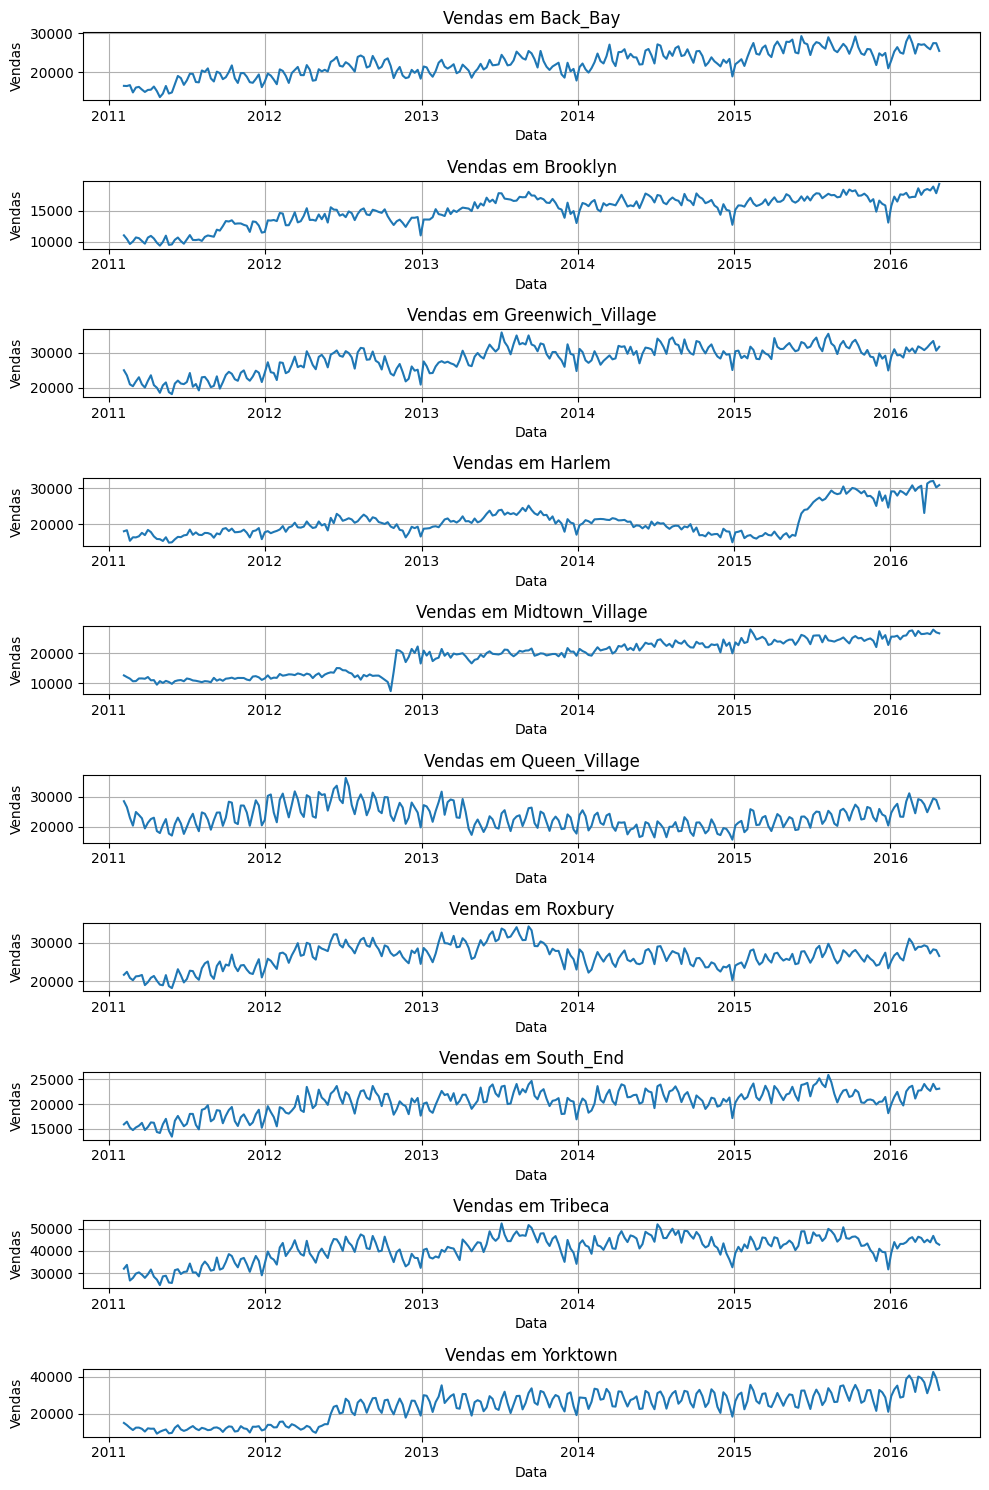

In [ ]:
# Define o tamanho da figura
fig, axs = plt.subplots(10, 1, figsize=(10, 15))

# Lista de colunas para plotar
colunas = ['Back_Bay', 'Brooklyn', 'Greenwich_Village', 'Harlem', 'Midtown_Village','Queen_Village','Roxbury','South_End','Tribeca','Yorktown']

# Itera sobre as colunas e cria um gráfico para cada uma
for i, coluna in enumerate(colunas):
    axs[i].plot(df_loja.index, df_loja[coluna])
    axs[i].set_title(f'Vendas em {coluna}')
    axs[i].set_xlabel('Data')
    axs[i].set_ylabel('Vendas')
    axs[i].grid(True)

# Ajusta o layout
plt.tight_layout()
plt.show()


Stationarity Tests

In [52]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import kpss

In [51]:
# Augmented Dickey-Fuller (ADF) Test

result = adfuller(df_loja['Back_Bay'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])

ADF Statistic: -2.2231640648646565
p-value: 0.19794590247340987


In [53]:
# Kwiatkowski-Phillips-Schmidt-Shin (KPSS) Test

result = kpss(df_loja['Back_Bay'], regression='c')
print('KPSS Statistic:', result[0])
print('p-value:', result[1])

KPSS Statistic: 2.156614589748756
p-value: 0.01


<ipython-input-53-ce907d162f5d>:1: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  result = kpss(df_loja['Back_Bay'], regression='c')


## Interpretation of ADF and KPSS Tests

The ADF test is used to check for the presence of a unit root in the time series, which would indicate non-stationarity. Here, the ADF statistic is -2.223, and the p-value is approximately 0.198. Given that the p-value (0.198) is greater than the typical significance level (e.g., 0.05), we fail to reject the null hypothesis. This suggests that the time series is likely non-stationary according to the ADF test.

The KPSS test checks for stationarity around a deterministic trend. Here, the KPSS statistic is approximately 2.157, and the p-value is 0.01. An InterpolationWarning indicates that the actual p-value is smaller than the lookup table's minimum value, meaning the series is strongly non-stationary according to this test.

Both tests agree that the time series is non-stationary. This means the statistical properties of the series, such as the mean and variance, change over time.



Checking for Seasonality and Trend

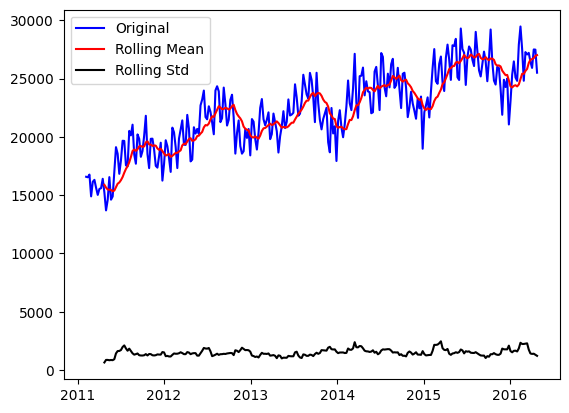

In [54]:
# Seasonality

rolling_mean = df_loja['Back_Bay'].rolling(window=12).mean()
rolling_std = df_loja['Back_Bay'].rolling(window=12).std()

plt.plot(df_loja['Back_Bay'], color='blue', label='Original')
plt.plot(rolling_mean, color='red', label='Rolling Mean')
plt.plot(rolling_std, color='black', label='Rolling Std')
plt.legend(loc='best')
plt.show()

# Model Selection and Training

In [ ]:
import os
import shutil

# Defina o caminho da pasta src no Google Drive
src_folder_path = '/content/drive/My Drive/Colab Notebooks/M3/SERIES TEMPORAIS/src'

# Lista todos os arquivos na pasta src
files = os.listdir(src_folder_path)

# Copie cada arquivo para o diretório atual do Colab
for file in files:
    if file.endswith('.py'):  # Verifique se o arquivo é um arquivo Python
        shutil.copy(os.path.join(src_folder_path, file), '.')  # Copie o arquivo para o diretório atual do Colab

In [ ]:
from tde import MultivariateTDE

Forecast Back Bay

In [ ]:
from error import MASE
from pprint import pprint
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import TimeSeriesSplit
from sklearn.model_selection import train_test_split
from sklearn.multioutput import MultiOutputRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor

In [ ]:
df_loja_back_bay = MultivariateTDE(df_loja, horizon=4, k=4, target_col='Back_Bay')
df_loja_back_bay.head()

,Back_Bay-3,Back_Bay-2,Back_Bay-1,Back_Bay-0,Brooklyn-3,Brooklyn-2,Brooklyn-1,Brooklyn-0,Greenwich_Village-3,Greenwich_Village-2,...,Tribeca-1,Tribeca-0,Yorktown-3,Yorktown-2,Yorktown-1,Yorktown-0,Back_Bay+1,Back_Bay+2,Back_Bay+3,Back_Bay+4
date,,,,,,,,,,,,,,,,,,,,,
2011-03-06,16580.0,16537.0,16768.0,14899.0,11026.0,10429.0,9634.0,10034.0,25000.0,23538.0,...,26609.0,27765.0,14974.0,13786.0,12317.0,11112.0,16153,16317.0,15636.0,15025.0
2011-03-13,16537.0,16768.0,14899.0,16153.0,10429.0,9634.0,10034.0,10686.0,23538.0,21002.0,...,27765.0,29721.0,13786.0,12317.0,11112.0,12405.0,16317,15636.0,15025.0,15539.0
2011-03-20,16768.0,14899.0,16153.0,16317.0,9634.0,10034.0,10686.0,10569.0,21002.0,20464.0,...,29721.0,30283.0,12317.0,11112.0,12405.0,12434.0,15636,15025.0,15539.0,15600.0
2011-03-27,14899.0,16153.0,16317.0,15636.0,10034.0,10686.0,10569.0,10117.0,20464.0,21828.0,...,30283.0,29253.0,11112.0,12405.0,12434.0,11767.0,15025,15539.0,15600.0,16408.0
2011-04-03,16153.0,16317.0,15636.0,15025.0,10686.0,10569.0,10117.0,9682.0,21828.0,23014.0,...,29253.0,27813.0,12405.0,12434.0,11767.0,10288.0,15539,15600.0,16408.0,15240.0


In [ ]:
is_future = df_loja_back_bay.columns.str.contains('\+')
X = df_loja_back_bay.iloc[:,~is_future]
Y = df_loja_back_bay.iloc[:,is_future]

In [ ]:
X_train_back_bay, X_test_back_bay, Y_train_back_bay, Y_test_back_bay = train_test_split(X, Y, test_size=0.2, shuffle=False)

Estimação de Desempenho

In [ ]:
cv = TimeSeriesSplit(n_splits=5)

cv_err_back_bay = []
for tr_idx, ts_idx in cv.split(X_train_back_bay, Y_train_back_bay):
    print('Training indices:')
    print(tr_idx[-5:])
    X_tr = X_train_back_bay.values[tr_idx]
    y_tr = Y_train_back_bay.values[tr_idx]

    X_vl = X_train_back_bay.values[ts_idx]
    y_vl = Y_train_back_bay.values[ts_idx]

    print('Training the model')
    model = Ridge()

    model.fit(X_tr, y_tr)
    print('Making predictions')
    pred = model.predict(X_vl)

    print('Computing error')
    err = mean_absolute_error(y_vl, pred)
    cv_err_back_bay.append(err)


print(cv_err_back_bay)
print(err)

Training indices:
[32 33 34 35 36]
Training the model
Making predictions
Computing error
Training indices:
[67 68 69 70 71]
Training the model
Making predictions
Computing error
Training indices:
[102 103 104 105 106]
Training the model
Making predictions
Computing error
Training indices:
[137 138 139 140 141]
Training the model
Making predictions
Computing error
Training indices:
[172 173 174 175 176]
Training the model
Making predictions
Computing error
[13335.316628845554, 2875.0988063801838, 1755.1291979634784, 1706.4590528942797, 1314.8283927491198]
1314.8283927491198


In [ ]:
# erro estimado em validação cruzada
print(f'Average error is: {np.mean(cv_err_back_bay)}')

Average error is: 4197.3664157665235


In [ ]:
model_list = {
    'Ridge': Ridge(),
    'Lasso': Lasso(max_iter=10000, alpha=1.0),
    'RandomForestRegressor': RandomForestRegressor(n_estimators=10),
    'DecisionTreeRegressor': DecisionTreeRegressor(),
    'KNeighborsRegressor': KNeighborsRegressor(),
}

In [ ]:
err_by_method_back_bay = {}
for method in model_list:
    print(f'Running model: {method}')
    cv_error = cross_val_score(model_list[method],
                               X_train_back_bay,
                               Y_train_back_bay,
                               cv=cv,
                               scoring='r2')

    err_by_method_back_bay[method] = -np.mean(cv_error)

Running model: Ridge
Running model: Lasso
Running model: RandomForestRegressor
Running model: DecisionTreeRegressor
Running model: KNeighborsRegressor


<Axes: >

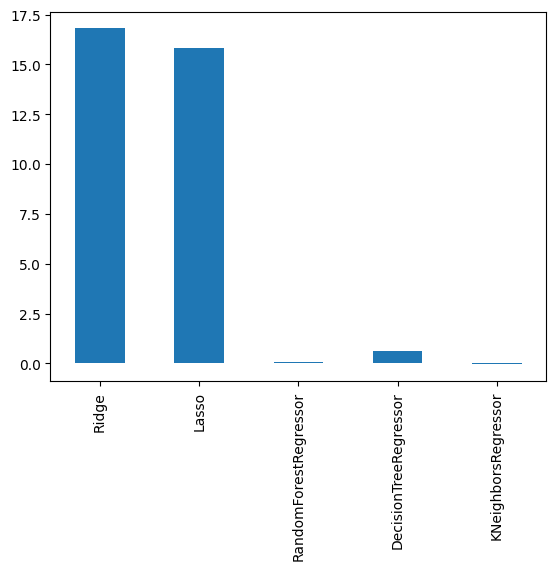

In [ ]:
pd.Series(err_by_method_back_bay).plot.bar()

In [ ]:
pprint(err_by_method_back_bay)

{'DecisionTreeRegressor': 0.7855383555157713,
 'KNeighborsRegressor': -0.04790093025343219,
 'Lasso': 13.598977387140565,
 'RandomForestRegressor': 0.06913896125896583,
 'Ridge': 16.81039128499478}


In [ ]:
# Definindo o modelo Ridge
ridge = Ridge()

# Definindo os parâmetros para busca
param_grid = {
    'alpha': [0.1, 1, 10],  # Valores para o parâmetro de regularização
    'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']  # Métodos para resolver o problema de otimização
}

# Criando o objeto GridSearchCV
grid_search_back_bay = GridSearchCV(estimator=ridge, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)

# Treinando o modelo
grid_search_back_bay.fit(X_train_back_bay, Y_train_back_bay)

# Obtendo os melhores parâmetros
best_params = grid_search_back_bay.best_params_

# Treinando um novo modelo com os melhores parâmetros
final_best_model_backbay = Ridge(**best_params)
final_best_model_backbay.fit(X_train_back_bay, Y_train_back_bay)

# Fazendo previsões com o melhor modelo
y_pred_best_back_bay = final_best_model_backbay.predict(X_test_back_bay)

# Avaliando o melhor modelo
mse_best = mean_squared_error(Y_test_back_bay, y_pred_best_back_bay)
r2_best = r2_score(Y_test_back_bay, y_pred_best_back_bay)
mae_test = mean_absolute_error(Y_test_back_bay, y_pred_best_back_bay)
print(f"Mean Squared Error (MSE) do melhor modelo: {mse_best}")
print(f"Mean Absolute Error (MAE) do melhor modelo: {mae_test}")
print(f"R^2 Score do melhor modelo: {r2_best}")

Fitting 5 folds for each of 21 candidates, totalling 105 fits
Mean Squared Error (MSE) do melhor modelo: 1945481.0564221572
Mean Absolute Error (MAE) do melhor modelo: 1128.38167426545
R^2 Score do melhor modelo: 0.3402334898300844


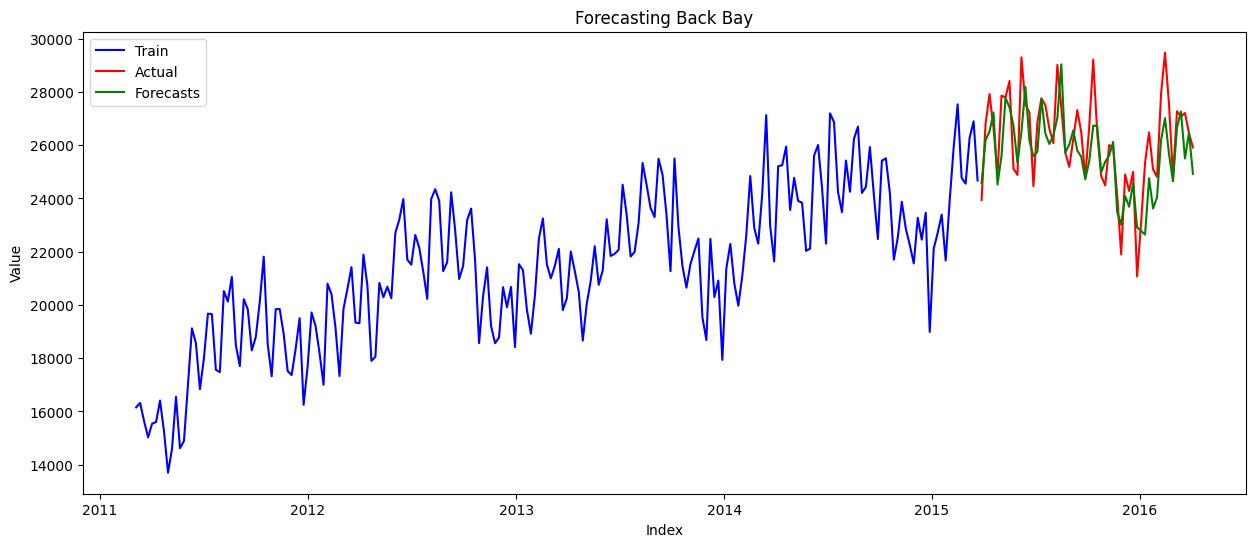

In [ ]:
Y_actual_back_bay = Y_test_back_bay.copy()  # Faça uma cópia dos dados, se necessário
Y_actual_back_bay.name = 'Actual'

previsoes_back_bay = pd.DataFrame(y_pred_best_back_bay).iloc[: , :1]

# Plotagem dos dados
plt.figure(figsize=(15, 6))
plt.plot(Y_train_back_bay.index, Y_train_back_bay.iloc[:,:1], label='Train', color='blue')
plt.plot(Y_test_back_bay.index, Y_test_back_bay.iloc[:,:1], label='Actual', color='red')
plt.plot(Y_actual_back_bay.index, previsoes_back_bay, label='Forecasts', color='green')

# Adicionando título e legendas
plt.title('Forecasting Back Bay')
plt.xlabel('Index')
plt.ylabel('Value')
plt.legend()

# Exibição do gráfico
plt.show()

# Forecast

In [ ]:
# Treinando o modelo com todo database

is_future = df_loja_back_bay.columns.str.contains('\+')
X_Back_Bay = df_loja_back_bay.iloc[:,~is_future]
Y_Back_Bay = df_loja_back_bay.iloc[:,is_future]

final_best_model_backbay.fit(X_Back_Bay, Y_Back_Bay)

# Fazendo previsões com o melhor modelo
features_Back_Bay = final_best_model_backbay.predict(X_Back_Bay)

# Ajustes Finais
previsoes_Back_Bay = pd.DataFrame(features_Back_Bay).iloc[len(features_Back_Bay)-1:, :]

previsoes_Back_BayT = previsoes_Back_Bay.transpose()

novos_indices = ['2016-04-10', '2016-04-17', '2016-04-24', '2016-05-01']
novos_indices = pd.to_datetime(novos_indices)

# Substitua os índices
previsoes_Back_BayT.index = novos_indices
previsoes_Back_BayT = previsoes_Back_BayT.rename(columns={265: 'Back_Bay'})
previsoes_Back_BayT

,Back_Bay
2016-04-10,26170.620974
2016-04-17,27789.132103
2016-04-24,27440.165073
2016-05-01,25006.924686


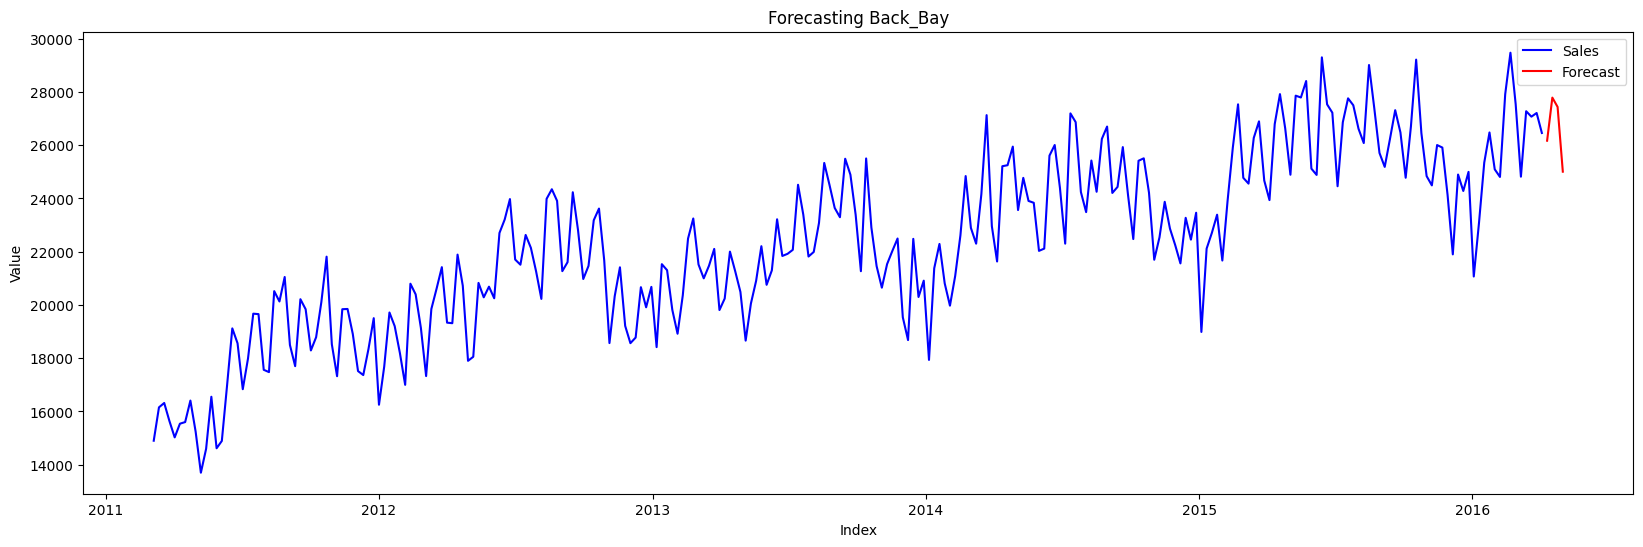

In [ ]:
# Plotagem dos dados
plt.figure(figsize=(20, 6))
plt.plot(X_Back_Bay.index, X_Back_Bay["Back_Bay-0"], label='Sales', color='blue')
plt.plot(previsoes_Back_BayT.index, previsoes_Back_BayT, label='Forecast', color='red')

# Adicionando título e legendas
plt.title('Forecasting Back_Bay')
plt.xlabel('Index')
plt.ylabel('Value')
plt.legend()

# Exibição do gráfico
plt.show()